In [273]:
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import acquire_PJ


# Sklearn Cluster and Scaler 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [274]:
zillow_df = acquire_PJ.get_zillow_data()
zillow_df.head()

Unnamed: 0       id  parcelid  airconditioningtypeid  \
0           0  1727539  14297519                    NaN   
1           1  1387261  17052889                    NaN   
2           2    11677  14186244                    NaN   
3           3  2288172  12177905                    NaN   
4           4  1970746  10887214                    1.0   

   architecturalstyletypeid  basementsqft  bathroomcnt  bedroomcnt  \
0                       NaN           NaN          3.5         4.0   
1                       NaN           NaN          1.0         2.0   
2                       NaN           NaN          2.0         3.0   
3                       NaN           NaN          3.0         4.0   
4                       NaN           NaN          3.0         3.0   

   buildingclasstypeid  buildingqualitytypeid  ...  censustractandblock  \
0                  NaN                    NaN  ...         6.059063e+13   
1                  NaN                    NaN  ...         6.111001e+13   
2                  NaN                    NaN  ...         6.059022e+13   
3                  NaN                    8.0  ...         6.037300e+13   
4                  NaN                    8.0  ...         6.037124e+13   

   logerror  transactiondate  airconditioningdesc  architecturalstyledesc  \
0  0.025595       2017-01-01                  NaN                     NaN   
1  0.055619       2017-01-01                  NaN                     NaN   
2  0.005383       2017-01-01                  NaN                     NaN   
3 -0.103410       2017-01-01                  NaN                     NaN   
4  0.006940       2017-01-01              Central                     NaN   

   buildingclassdesc  heatingorsystemdesc        propertylandusedesc  \
0                NaN                  NaN  Single Family Residential   
1                NaN                  NaN  Single Family Residential   
2                NaN                  NaN  Single Family Residential   
3                NaN              Central  Single Family Residential   
4                NaN              Central                Condominium   

   storydesc  typeconstructiondesc  
0        NaN                   NaN  
1        NaN                   NaN  
2        NaN                   NaN  
3        NaN                   NaN  
4        NaN                   NaN  

[5 rows x 69 columns]

In [275]:
# Create a function that will remove rows and columns that have missing values past a certain threshold.
def handle_missing_values(df, p_row = 0.84, p_col = 0.84):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(p_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(p_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [276]:
zillow_df = handle_missing_values(zillow_df)

In [277]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    77474 non-null  int64  
 1   id                            77474 non-null  int64  
 2   parcelid                      77474 non-null  int64  
 3   bathroomcnt                   77474 non-null  float64
 4   bedroomcnt                    77474 non-null  float64
 5   calculatedbathnbr             76959 non-null  float64
 6   calculatedfinishedsquarefeet  77373 non-null  float64
 7   finishedsquarefeet12          73919 non-null  float64
 8   fips                          77474 non-null  float64
 9   fullbathcnt                   76959 non-null  float64
 10  latitude                      77474 non-null  float64
 11  longitude                     77474 non-null  float64
 12  lotsizesquarefeet             69300 non-null  float64
 13  p

In [278]:
# Create a list of columns to drop.
columns_to_drop = ['transactiondate','assessmentyear','id','Unnamed: 0','parcelid','calculatedbathnbr'
                   ,'finishedsquarefeet12','fullbathcnt','propertycountylandusecode','propertylandusetypeid',
                   'rawcensustractandblock','regionidcity','regionidcounty','regionidzip',
                   'structuretaxvaluedollarcnt','censustractandblock','propertylandusedesc', 'roomcnt']





In [279]:
def drop_columns(df, drop_col):
    df = df.drop(columns=drop_col)
    return df

In [280]:
zillow_df = drop_columns(zillow_df, columns_to_drop)

In [281]:
zillow_df.shape

(77474, 12)

In [282]:
for col in zillow_df.columns:
    if zillow_df[col].isna().sum() > 0:
        zillow_df[col] = zillow_df[col].fillna(value = zillow_df[col].mean())
        #print(zillow_df[col])

In [283]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   77474 non-null  float64
 1   bedroomcnt                    77474 non-null  float64
 2   calculatedfinishedsquarefeet  77474 non-null  float64
 3   fips                          77474 non-null  float64
 4   latitude                      77474 non-null  float64
 5   longitude                     77474 non-null  float64
 6   lotsizesquarefeet             77474 non-null  float64
 7   yearbuilt                     77474 non-null  float64
 8   taxvaluedollarcnt             77474 non-null  float64
 9   landtaxvaluedollarcnt         77474 non-null  float64
 10  taxamount                     77474 non-null  float64
 11  logerror                      77474 non-null  float64
dtypes: float64(12)
memory usage: 7.7 MB


In [284]:
zillow_df.isna().sum()

bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
yearbuilt                       0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
dtype: int64

In [285]:
zillow_df = zillow_df.rename(columns = {'fips':'county', 'calculatedfinishedsquarefeet' : 'area', 'bathroomcnt' : 'bathrooms',
                         'bedroomcnt' : 'bedrooms', 'poolcnt' : 'pools', 'garagecarcnt' : 'garages',
                          'taxvaluedollarcnt': 'tax_value'})

In [286]:
# Cleaning the data
# Creating counties
zillow_df['LA_County']= zillow_df['county'] == 6037
zillow_df['Orange_County']= zillow_df['county'] == 6059
zillow_df['Ventura_County']= zillow_df['county'] == 6111


In [287]:
zillow_df['LA_County'] = zillow_df['LA_County'].replace(False, 0)
zillow_df['LA_County'] = zillow_df['LA_County'].replace(True, 1)

zillow_df['Orange_County'] = zillow_df['Orange_County'].replace(False, 0)
zillow_df['Orange_County'] = zillow_df['Orange_County'].replace(True, 1)

zillow_df['Ventura_County'] = zillow_df['Ventura_County'].replace(False, 0)
zillow_df['Ventura_County'] = zillow_df['Ventura_County'].replace(True, 1)

In [288]:
def yearbuilt_years(df):
    df.yearbuilt =  df.yearbuilt.astype(int)
    year = date.today().year
    df['age'] = year - df.yearbuilt
    # dropping the 'yearbuilt' column now that i have the age
    df = df.drop(columns=['yearbuilt'])
    return df

In [289]:
zillow_df = yearbuilt_years(zillow_df)

In [290]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77474 entries, 0 to 77573
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              77474 non-null  float64
 1   bedrooms               77474 non-null  float64
 2   area                   77474 non-null  float64
 3   county                 77474 non-null  float64
 4   latitude               77474 non-null  float64
 5   longitude              77474 non-null  float64
 6   lotsizesquarefeet      77474 non-null  float64
 7   tax_value              77474 non-null  float64
 8   landtaxvaluedollarcnt  77474 non-null  float64
 9   taxamount              77474 non-null  float64
 10  logerror               77474 non-null  float64
 11  LA_County              77474 non-null  int64  
 12  Orange_County          77474 non-null  int64  
 13  Ventura_County         77474 non-null  int64  
 14  age                    77474 non-null  int64  
dtypes:

In [291]:
zillow_df = zillow_df[zillow_df.bedrooms != 0]
zillow_df = zillow_df[zillow_df.bathrooms != 0]

In [292]:
zillow_df.shape

(76720, 15)

In [293]:
# Later Lets look at pools and garages!
# Create new features here

zillow_df['acres']= zillow_df.lotsizesquarefeet/43560


# ratio of bathrooms to bedrooms
zillow_df['bed_bath_ratio'] = zillow_df.bedrooms / zillow_df.bathrooms

# bin ages
zillow_df['age_bins'] = pd.cut(zillow_df.age, 
                               bins = [0, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140],
                               labels = [0, .066, .133, .20, .266, .333, .40, .466, .533, 
                                     .60, .666, .733, .8, .866, .933])

# bin acres
zillow_df['acres_bin'] = pd.cut(zillow_df.acres, bins = [0, .10, .15, .25, .5, 1, 5, 10, 20, 50, 200], 
                    labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9])
    
    
# update datatypes of binned values to be float
#zillow_df = zillow_df.astype({'acres_bin': 'float64', 'age_bin': 'float64'}).dtypes


In [294]:
zillow_df = zillow_df.astype({'acres_bin': float, 'age_bins': float})

In [295]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76720 entries, 0 to 77573
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              76720 non-null  float64
 1   bedrooms               76720 non-null  float64
 2   area                   76720 non-null  float64
 3   county                 76720 non-null  float64
 4   latitude               76720 non-null  float64
 5   longitude              76720 non-null  float64
 6   lotsizesquarefeet      76720 non-null  float64
 7   tax_value              76720 non-null  float64
 8   landtaxvaluedollarcnt  76720 non-null  float64
 9   taxamount              76720 non-null  float64
 10  logerror               76720 non-null  float64
 11  LA_County              76720 non-null  int64  
 12  Orange_County          76720 non-null  int64  
 13  Ventura_County         76720 non-null  int64  
 14  age                    76720 non-null  int64  
 15  ac

## Outliers

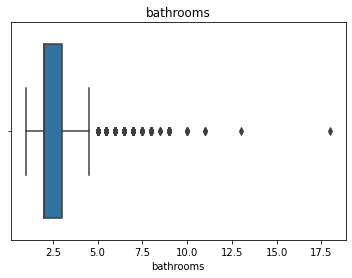

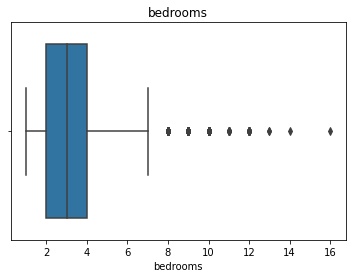

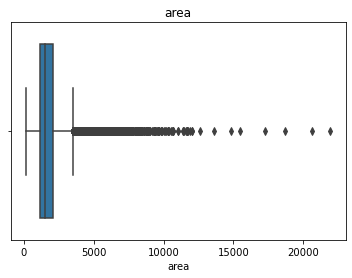

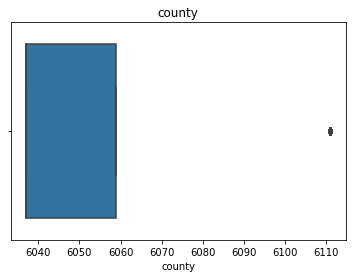

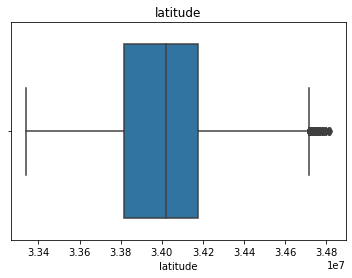

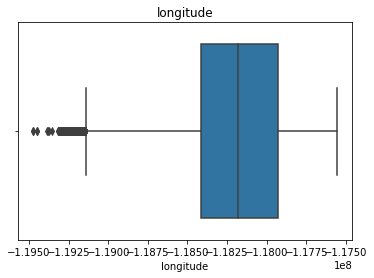

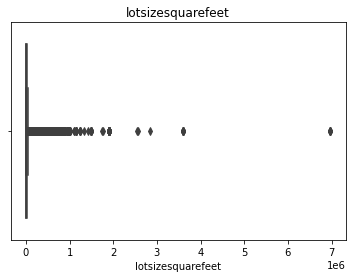

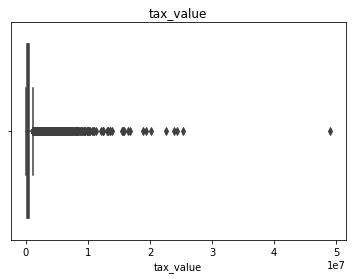

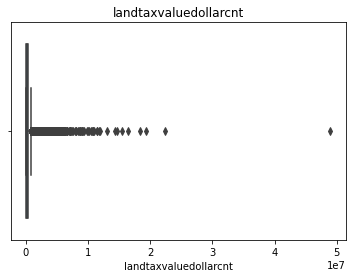

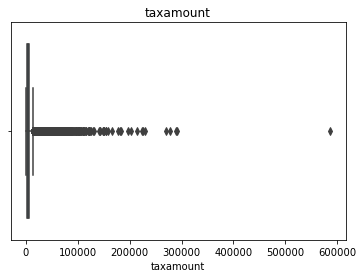

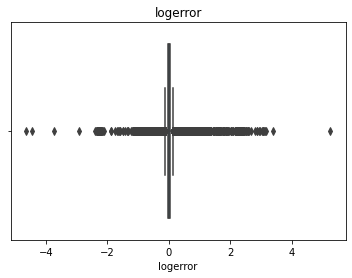

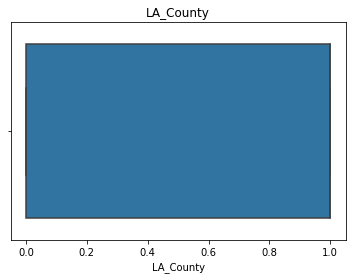

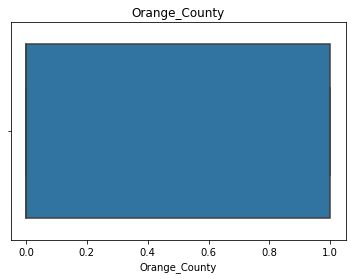

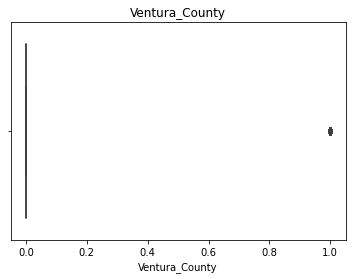

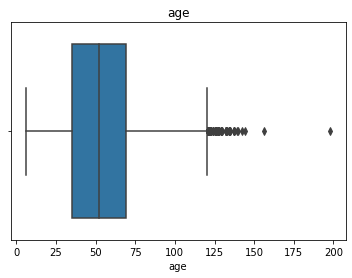

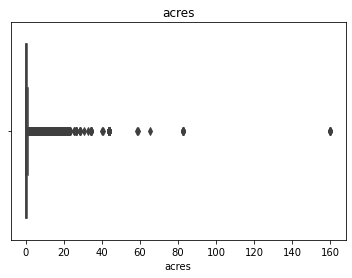

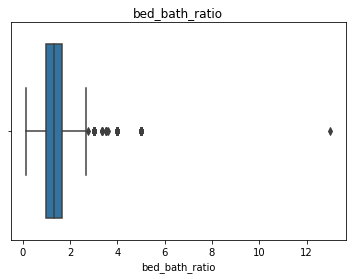

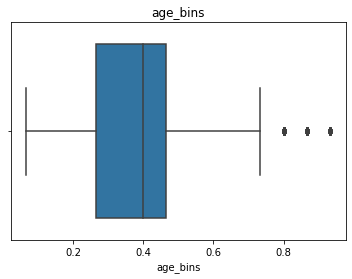

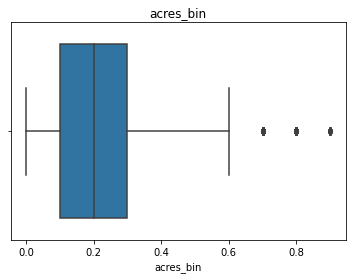

In [296]:
# viewing outliers
for col in zillow_df.columns:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

In [297]:
def remove_outliers(df, k, col_list):
    ''' remove outliers from a list of columns in a dataframe 
        and return that dataframe
    '''

    for col in col_list:

        q1, q3 = df[col].quantile([.25, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound

        # return dataframe without outliers
        
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
        
    return df

### roomcnt caused an issue

In [298]:
col_list = ['bedrooms', 'bathrooms', 'area', 'tax_value',
            'lotsizesquarefeet', 'taxamount', 'age', 'acres',
           'bed_bath_ratio', 'landtaxvaluedollarcnt']
k = 1.5
    
zillow_df = remove_outliers(zillow_df, k, col_list)

In [299]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45647 entries, 1 to 77573
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bathrooms              45647 non-null  float64
 1   bedrooms               45647 non-null  float64
 2   area                   45647 non-null  float64
 3   county                 45647 non-null  float64
 4   latitude               45647 non-null  float64
 5   longitude              45647 non-null  float64
 6   lotsizesquarefeet      45647 non-null  float64
 7   tax_value              45647 non-null  float64
 8   landtaxvaluedollarcnt  45647 non-null  float64
 9   taxamount              45647 non-null  float64
 10  logerror               45647 non-null  float64
 11  LA_County              45647 non-null  int64  
 12  Orange_County          45647 non-null  int64  
 13  Ventura_County         45647 non-null  int64  
 14  age                    45647 non-null  int64  
 15  ac

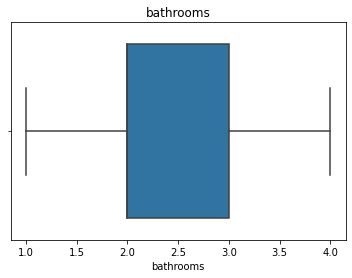

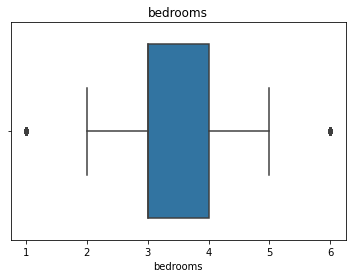

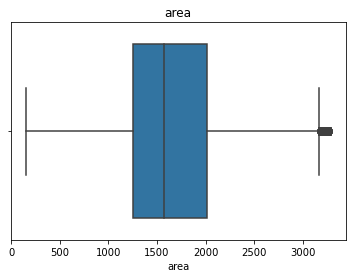

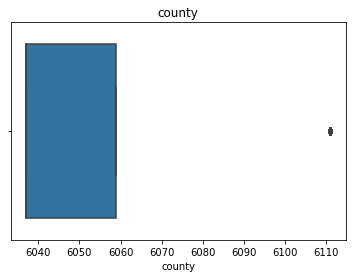

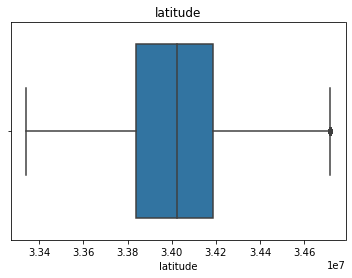

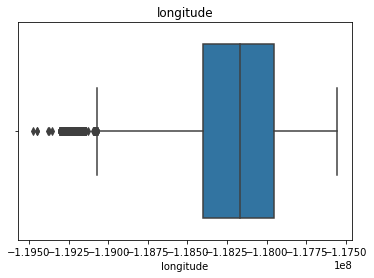

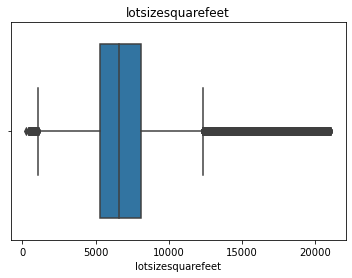

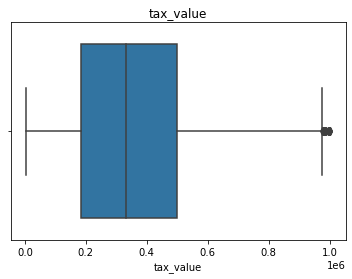

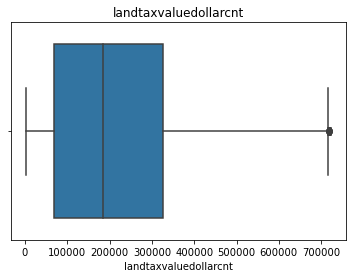

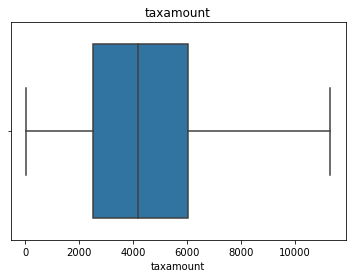

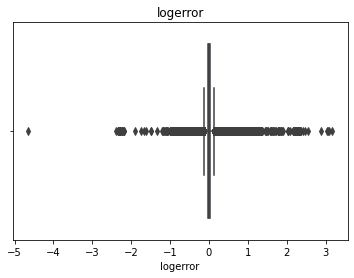

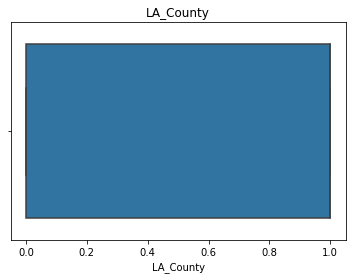

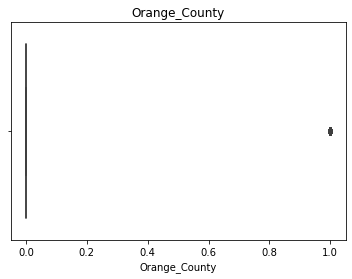

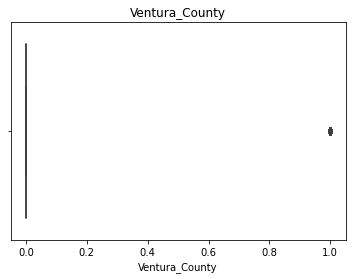

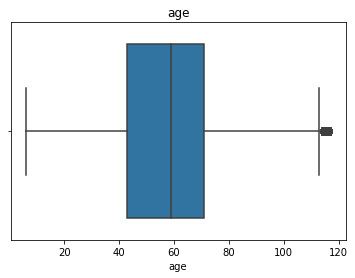

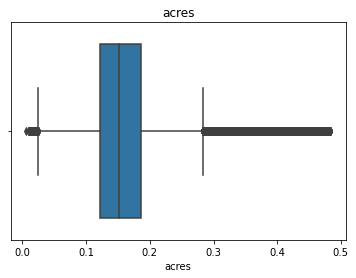

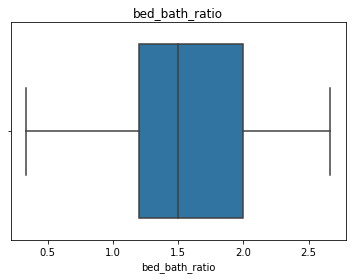

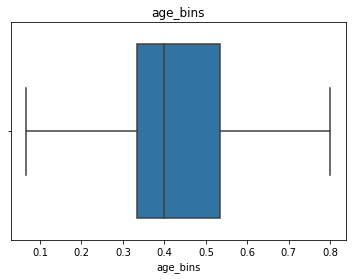

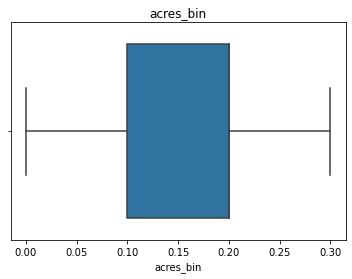

In [300]:
# viewing outliers
for col in zillow_df.columns:
    sns.boxplot(zillow_df[col])
    plt.title(col)
    plt.show()

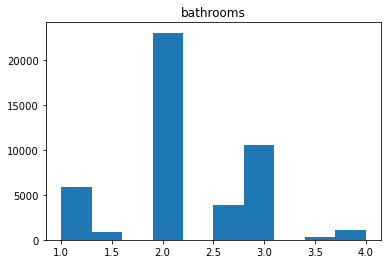

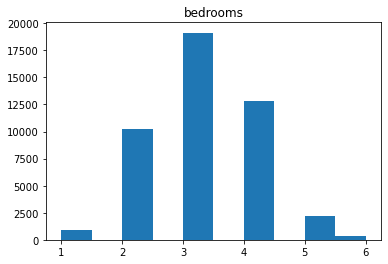

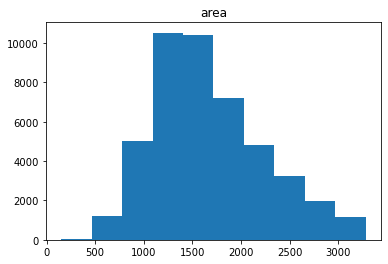

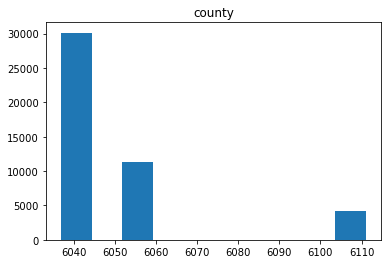

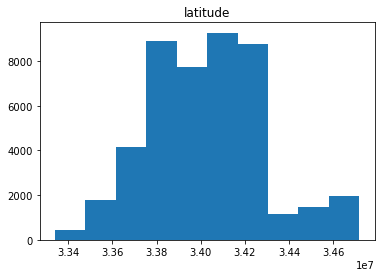

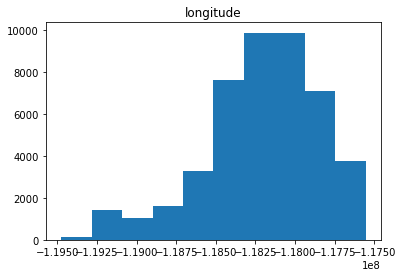

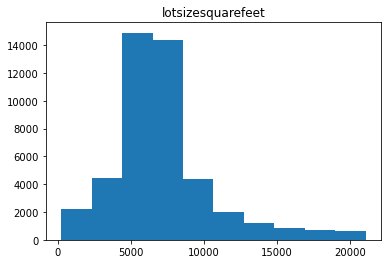

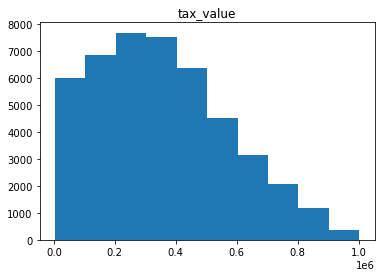

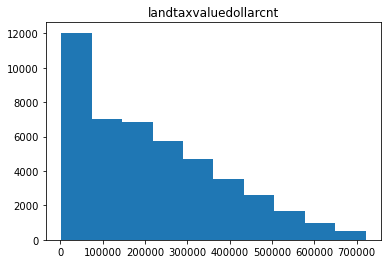

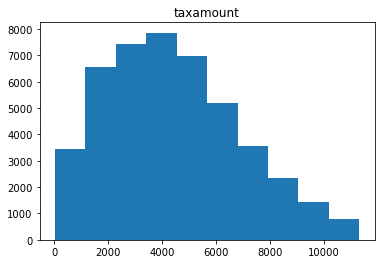

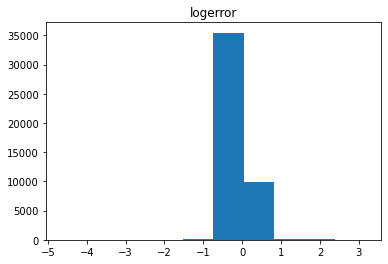

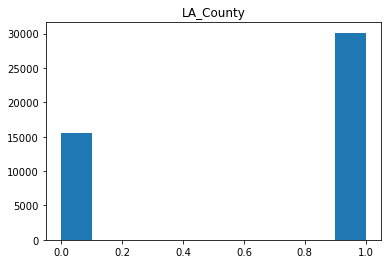

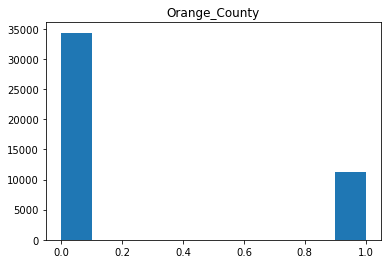

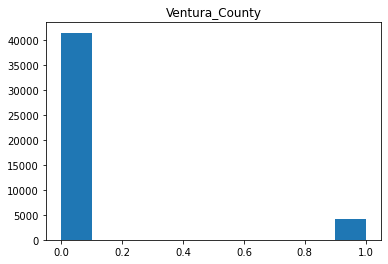

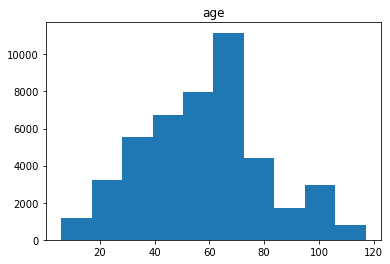

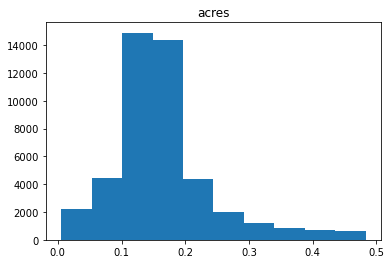

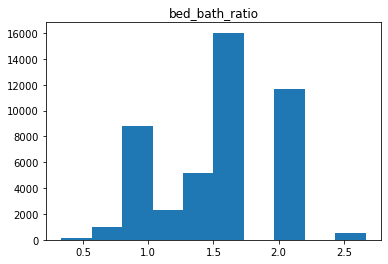

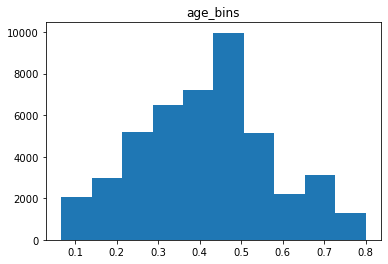

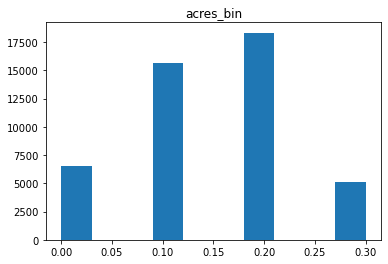

In [301]:
for col in zillow_df.columns:
    plt.hist(zillow_df[col])
    plt.title(col)
    plt.show()

In [302]:

# This is to create dataframs that only consist of individual counties for future exploration ideas
# LA only DF
df_la = zillow_df[zillow_df.LA_County == 1]
# Orange county only DF
df_or = zillow_df[zillow_df.Orange_County == 1]
# Ventura county only DF
df_ve = zillow_df[zillow_df.Ventura_County == 1]

In [303]:
# Splitting my data
def split(df, target_var):
    
    # split df into train_validate (80%) and test (20%)
    train_validate, test = train_test_split(df, test_size=.20, random_state=13)
    
    # split train_validate into train(70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    # create X_train by dropping the target variable 
    X_train = train.drop(columns=[target_var])
    # create y_train by keeping only the target variable.
    y_train = train[[target_var]]

    # create X_validate by dropping the target variable 
    X_validate = validate.drop(columns=[target_var])
    # create y_validate by keeping only the target variable.
    y_validate = validate[[target_var]]

    # create X_test by dropping the target variable 
    X_test = test.drop(columns=[target_var])
    # create y_test by keeping only the target variable.
    y_test = test[[target_var]]

    partitions = [train, X_train, y_train, validate, X_validate, y_validate, test, X_test, y_test]
    return partitions

In [304]:
partitions = split(zillow_df, target_var = 'logerror')

In [305]:
train = partitions[0]

In [306]:
train.shape

(25561, 19)

In [307]:
train['abs_log'] = train['logerror'].abs()

In [345]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25561 entries, 62952 to 55595
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bathrooms              25561 non-null  float64 
 1   bedrooms               25561 non-null  float64 
 2   area                   25561 non-null  float64 
 3   county                 25561 non-null  float64 
 4   latitude               25561 non-null  float64 
 5   longitude              25561 non-null  float64 
 6   lotsizesquarefeet      25561 non-null  float64 
 7   tax_value              25561 non-null  float64 
 8   landtaxvaluedollarcnt  25561 non-null  float64 
 9   taxamount              25561 non-null  float64 
 10  logerror               25561 non-null  float64 
 11  LA_County              25561 non-null  int64   
 12  Orange_County          25561 non-null  int64   
 13  Ventura_County         25561 non-null  int64   
 14  age                    25561 non-n

In [347]:
train.logerror_bins.value_counts()

(-0.05, 0.05]    17082
(0.05, 0.2]       3844
(-0.2, -0.05]     3041
(0.2, 4.0]        1112
(-5.0, -0.2]       482
Name: logerror_bins, dtype: int64

In [350]:
#train['logerror_bins'] = pd.cut(train.logerror, [-5, -.2, -.05, .05, .2, 4])

#train['logerror_bins'] = pd


train['logerror_bins'] = pd.cut(train.logerror, bins = [-5, -3, -2, -1, -.05, 0, .05, 1, 2, 3, 4],
                                      labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9])

#zillow_df['acres_bin'] = pd.cut(zillow_df.acres, bins = [0, .10, .15, .25, .5, 1, 5, 10, 20, 50, 200], 
#                    labels = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9])

In [356]:
train.logerror_bins.value_counts()

0.5    9473
0.4    7609
0.6    4883
0.3    3509
0.7      54
0.8      18
0.2       7
0.1       6
0.0       1
0.9       1
Name: logerror_bins, dtype: int64

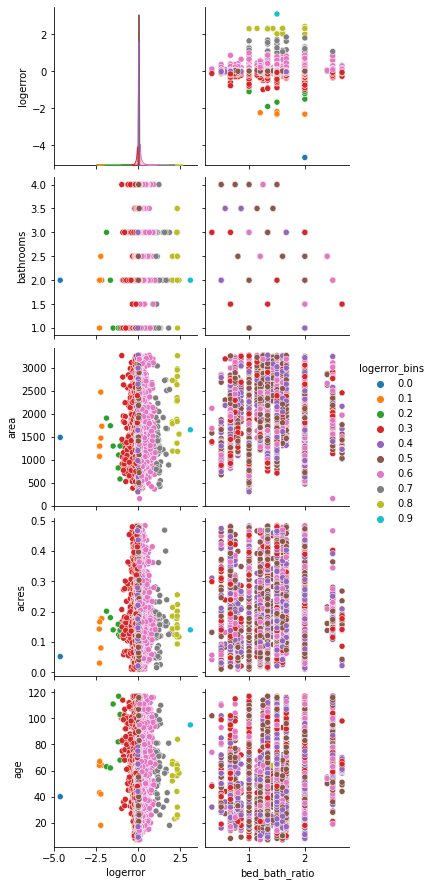

In [357]:
sns.pairplot(data = train, hue = 'logerror_bins', 
             x_vars = ['logerror', 
                       'bed_bath_ratio'],
             y_vars = ['logerror', 'bathrooms', 'area', 'acres', 'age'])

<AxesSubplot:xlabel='LA_County', ylabel='logerror'>

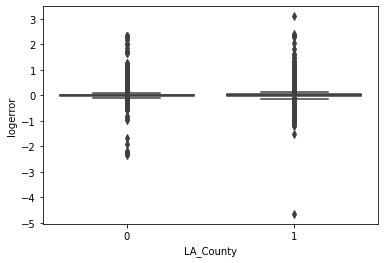

In [312]:
sns.boxplot(train.LA_County, train.logerror)

<AxesSubplot:xlabel='Ventura_County', ylabel='logerror'>

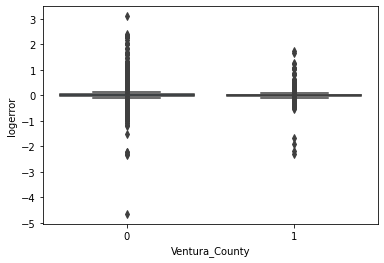

In [313]:
sns.boxplot(train.Ventura_County, train.logerror)

<AxesSubplot:xlabel='Orange_County', ylabel='logerror'>

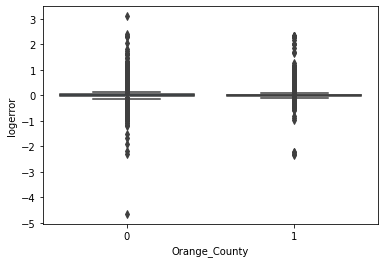

In [314]:
sns.boxplot(train.Orange_County, train.logerror)

In [315]:
train.head()

bathrooms  bedrooms    area  county    latitude    longitude  \
62952        2.0       3.0  1910.0  6037.0  34141135.0 -118069733.0   
18519        3.0       5.0  2965.0  6037.0  34116699.0 -118226054.0   
31433        3.0       3.0  2388.0  6037.0  33875945.0 -118355497.0   
2249         2.0       3.0  1353.0  6059.0  33858501.0 -117963533.0   
24002        1.5       2.0  1024.0  6059.0  33842442.0 -117944157.0   

       lotsizesquarefeet  tax_value  landtaxvaluedollarcnt  taxamount  ...  \
62952            14690.0    84943.0                34939.0    1358.67  ...   
18519             5562.0   439333.0               292893.0    5438.55  ...   
31433            17419.0   350032.0               109462.0    4386.48  ...   
2249              6700.0   129412.0                71148.0    1748.20  ...   
24002             1048.0   201596.0               146657.0    2601.14  ...   

       LA_County  Orange_County  Ventura_County  age     acres  \
62952          1              0               0   87  0.337236   
18519          1              0               0   41  0.127686   
31433          1              0               0   33  0.399885   
2249           0              1               0   67  0.153811   
24002          0              1               0   58  0.024059   

       bed_bath_ratio  age_bins  acres_bin   abs_log  logerror_bins  
62952        1.500000     0.600        0.3  0.023357  (-0.05, 0.05]  
18519        1.666667     0.333        0.1  0.114887    (0.05, 0.2]  
31433        1.000000     0.266        0.3  0.139967    (0.05, 0.2]  
2249         1.500000     0.466        0.2  0.002537  (-0.05, 0.05]  
24002        1.333333     0.400        0.0  0.066029  (-0.2, -0.05]  

[5 rows x 21 columns]

In [316]:
train.abs_log.max()

4.65542037764

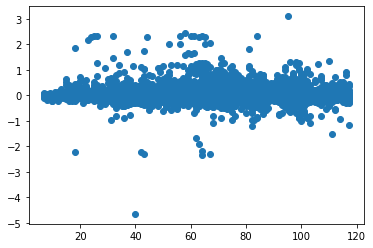

In [317]:
plt.scatter(x = 'age', y = 'logerror', data = train)

<AxesSubplot:xlabel='age_bins', ylabel='logerror'>

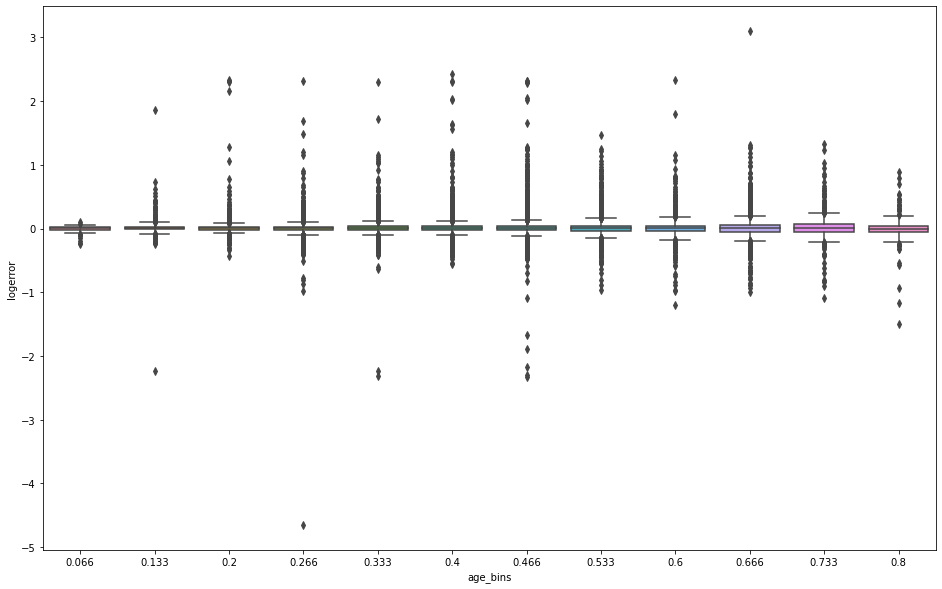

In [318]:
plt.figure(figsize = (16,10))
sns.boxplot(train.age_bins, train.logerror)

<AxesSubplot:xlabel='acres_bin', ylabel='logerror'>

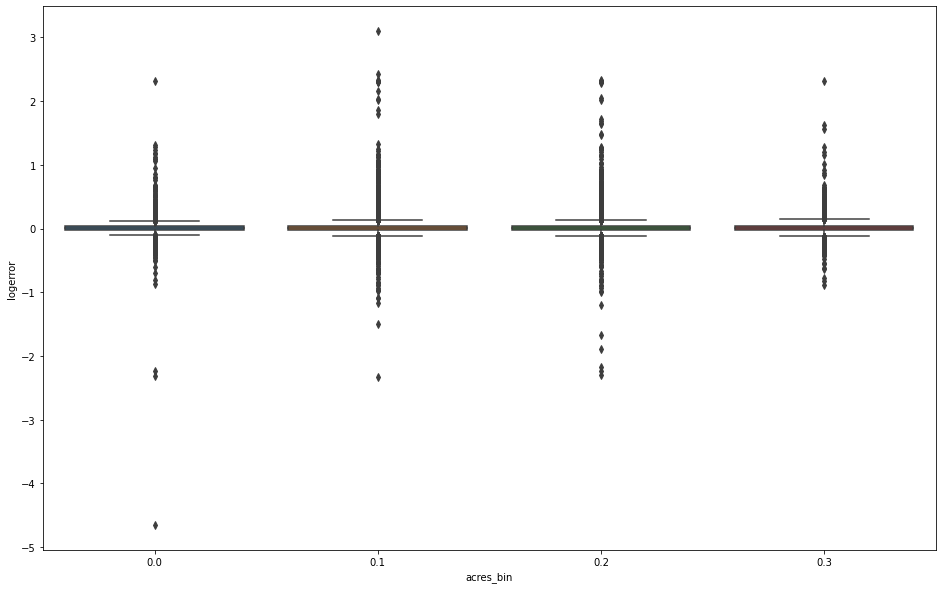

In [319]:
plt.figure(figsize = (16,10))
sns.boxplot(train.acres_bin, train.logerror)

In [359]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25561 entries, 62952 to 55595
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   bathrooms              25561 non-null  float64 
 1   bedrooms               25561 non-null  float64 
 2   area                   25561 non-null  float64 
 3   county                 25561 non-null  float64 
 4   latitude               25561 non-null  float64 
 5   longitude              25561 non-null  float64 
 6   lotsizesquarefeet      25561 non-null  float64 
 7   tax_value              25561 non-null  float64 
 8   landtaxvaluedollarcnt  25561 non-null  float64 
 9   taxamount              25561 non-null  float64 
 10  logerror               25561 non-null  float64 
 11  LA_County              25561 non-null  int64   
 12  Orange_County          25561 non-null  int64   
 13  Ventura_County         25561 non-null  int64   
 14  age                    25561 non-n

In [360]:
train.astype({'logerror_bins': float})

bathrooms  bedrooms    area  county    latitude    longitude  \
62952        2.0       3.0  1910.0  6037.0  34141135.0 -118069733.0   
18519        3.0       5.0  2965.0  6037.0  34116699.0 -118226054.0   
31433        3.0       3.0  2388.0  6037.0  33875945.0 -118355497.0   
2249         2.0       3.0  1353.0  6059.0  33858501.0 -117963533.0   
24002        1.5       2.0  1024.0  6059.0  33842442.0 -117944157.0   
...          ...       ...     ...     ...         ...          ...   
29765        2.0       3.0  2398.0  6059.0  33502194.0 -117668418.0   
71748        3.0       4.0  2183.0  6037.0  33962461.0 -118292911.0   
65732        1.0       2.0   981.0  6037.0  33972305.0 -118250698.0   
5481         3.0       5.0  2649.0  6037.0  33754037.0 -118299292.0   
55595        2.0       4.0  1914.0  6059.0  33776487.0 -118042298.0   

       lotsizesquarefeet  tax_value  landtaxvaluedollarcnt  taxamount  ...  \
62952            14690.0    84943.0                34939.0    1358.67  ...   
18519             5562.0   439333.0               292893.0    5438.55  ...   
31433            17419.0   350032.0               109462.0    4386.48  ...   
2249              6700.0   129412.0                71148.0    1748.20  ...   
24002             1048.0   201596.0               146657.0    2601.14  ...   
...                  ...        ...                    ...        ...  ...   
29765            18000.0   187564.0                81199.0    1983.76  ...   
71748             5258.0   393000.0               340100.0    4909.45  ...   
65732             4774.0   231138.0               132525.0    3311.05  ...   
5481              9614.0   569136.0               241071.0    7030.88  ...   
55595             5200.0    83470.0                28694.0    1450.06  ...   

       LA_County  Orange_County  Ventura_County  age     acres  \
62952          1              0               0   87  0.337236   
18519          1              0               0   41  0.127686   
31433          1              0               0   33  0.399885   
2249           0              1               0   67  0.153811   
24002          0              1               0   58  0.024059   
...          ...            ...             ...  ...       ...   
29765          0              1               0   48  0.413223   
71748          1              0               0   90  0.120707   
65732          1              0               0   75  0.109596   
5481           1              0               0   44  0.220707   
55595          0              1               0   55  0.119376   

       bed_bath_ratio  age_bins  acres_bin   abs_log  logerror_bins  
62952        1.500000     0.600        0.3  0.023357            0.4  
18519        1.666667     0.333        0.1  0.114887            0.6  
31433        1.000000     0.266        0.3  0.139967            0.6  
2249         1.500000     0.466        0.2  0.002537            0.4  
24002        1.333333     0.400        0.0  0.066029            0.3  
...               ...       ...        ...       ...            ...  
29765        1.500000     0.333        0.3  0.055390            0.3  
71748        1.333333     0.600        0.1  0.008758            0.5  
65732        2.000000     0.533        0.1  0.032101            0.4  
5481         1.666667     0.333        0.2  0.023129            0.4  
55595        2.000000     0.400        0.1  0.010762            0.5  

[25561 rows x 21 columns]

In [252]:
list(train.select_dtypes('number').columns)

['bathrooms',
 'bedrooms',
 'area',
 'county',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'roomcnt',
 'tax_value',
 'landtaxvaluedollarcnt',
 'taxamount',
 'logerror',
 'LA_County',
 'Orange_County',
 'Ventura_County',
 'age',
 'acres',
 'bed_bath_ratio',
 'age_bins',
 'acres_bin',
 'abs_log']

In [321]:
X_train = partitions[1]

In [322]:
# Robust Scaler for the outliers still in here even after using a outlier remover
# Set scaler
scaler = MinMaxScaler(copy=True)
x_train_scaled = scaler.fit_transform(X_train)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = X_train.columns.to_list())

In [323]:
x_train_scaled.head()

bathrooms  bedrooms      area    county  latitude  longitude  \
0   0.333333       0.4  0.561482  0.000000  0.581106   0.732089   
1   0.666667       0.8  0.898435  0.000000  0.563372   0.650667   
2   0.666667       0.4  0.714149  0.000000  0.388642   0.583245   
3   0.333333       0.4  0.383584  0.297297  0.375982   0.787405   
4   0.166667       0.2  0.278505  0.297297  0.364327   0.797497   

   lotsizesquarefeet  tax_value  landtaxvaluedollarcnt  taxamount  LA_County  \
0           0.691286   0.076407               0.043242   0.118489        1.0   
1           0.248630   0.434103               0.402679   0.479588        1.0   
2           0.823626   0.343969               0.147083   0.386473        1.0   
3           0.303816   0.121291               0.093696   0.152965        0.0   
4           0.029727   0.194148               0.198911   0.228457        0.0   

   Orange_County  Ventura_County       age     acres  bed_bath_ratio  \
0            0.0             0.0  0.727273  0.691286        0.500000   
1            0.0             0.0  0.309091  0.248630        0.571429   
2            0.0             0.0  0.236364  0.823626        0.285714   
3            1.0             0.0  0.545455  0.303816        0.500000   
4            1.0             0.0  0.463636  0.029727        0.428571   

   age_bins  acres_bin  
0  0.727520   1.000000  
1  0.363760   0.333333  
2  0.272480   1.000000  
3  0.544959   0.666667  
4  0.455041   0.000000

<AxesSubplot:xlabel='age_bins', ylabel='logerror'>

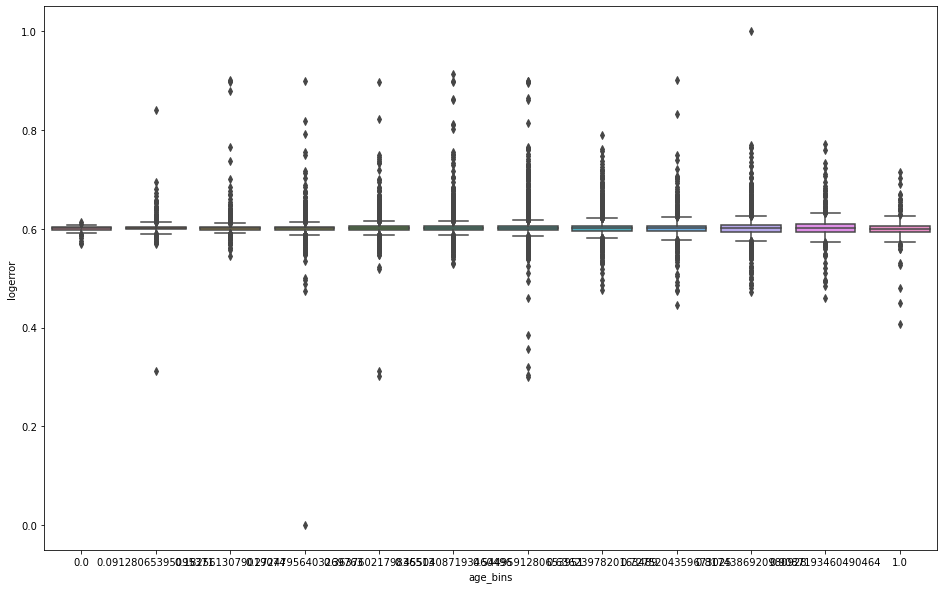

In [256]:
plt.figure(figsize = (16,10))
sns.boxplot(train.age_bins, train.logerror)

<AxesSubplot:xlabel='acres_bin', ylabel='logerror'>

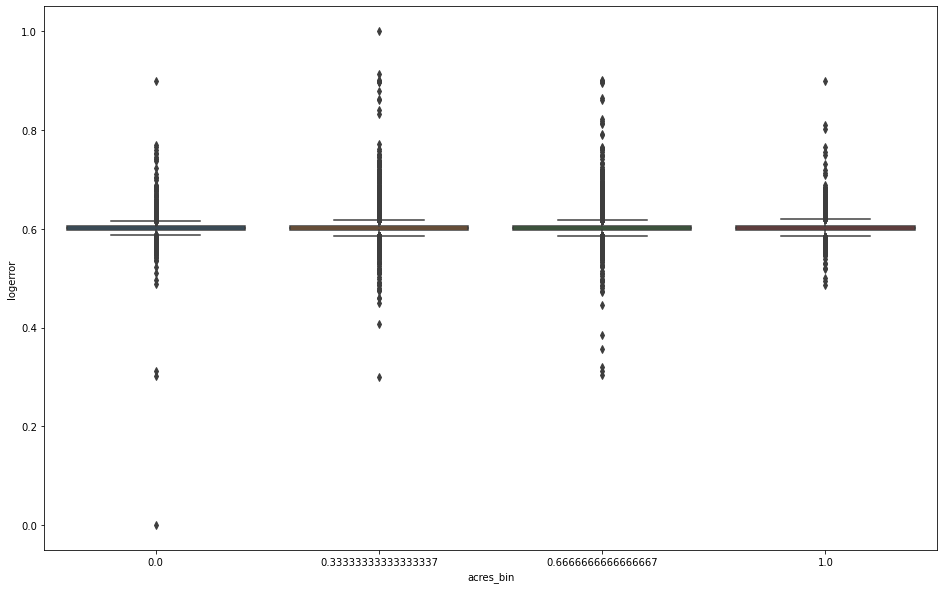

In [257]:
plt.figure(figsize = (16,10))
sns.boxplot(train.acres_bin, train.logerror)

<AxesSubplot:xlabel='LA_County', ylabel='abs_log'>

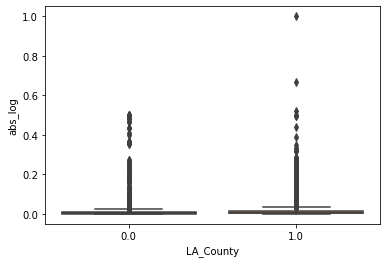

In [259]:
sns.boxplot(train.LA_County, train.abs_log)

<AxesSubplot:xlabel='area', ylabel='logerror'>

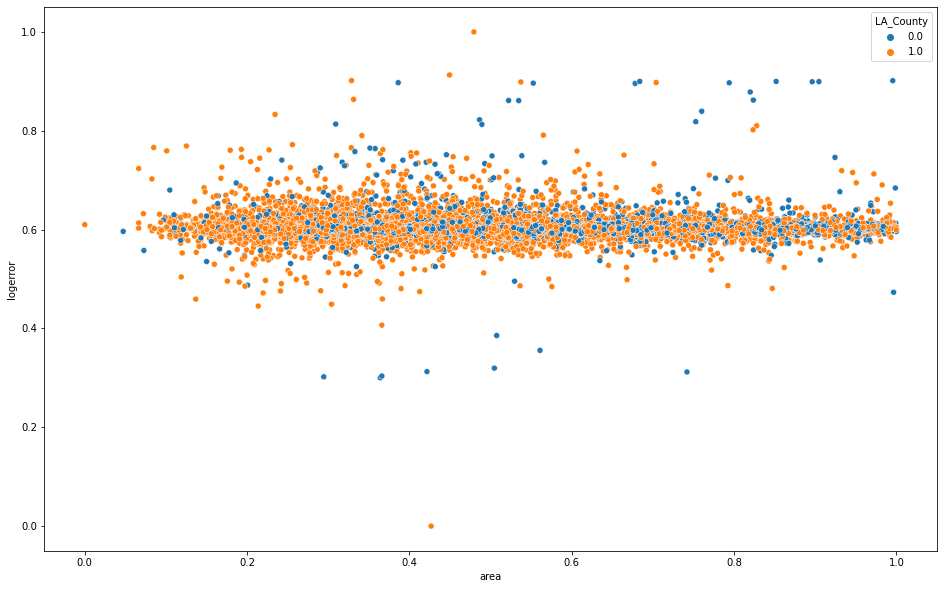

In [265]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'area', y = 'logerror', data = train, hue = 'LA_County')

<AxesSubplot:xlabel='area', ylabel='logerror'>

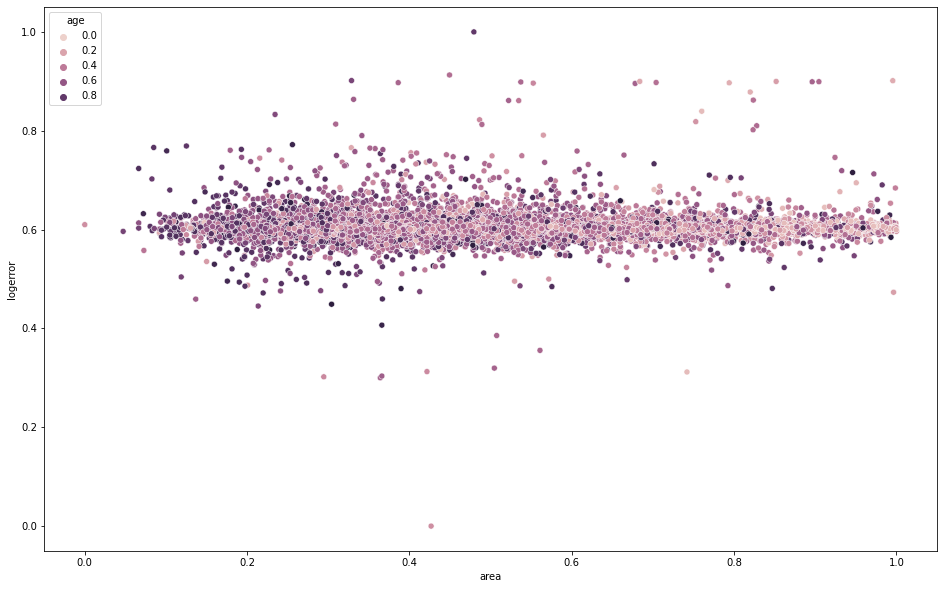

In [266]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'area', y = 'logerror', data = train, hue = 'age')

<AxesSubplot:xlabel='area', ylabel='logerror'>

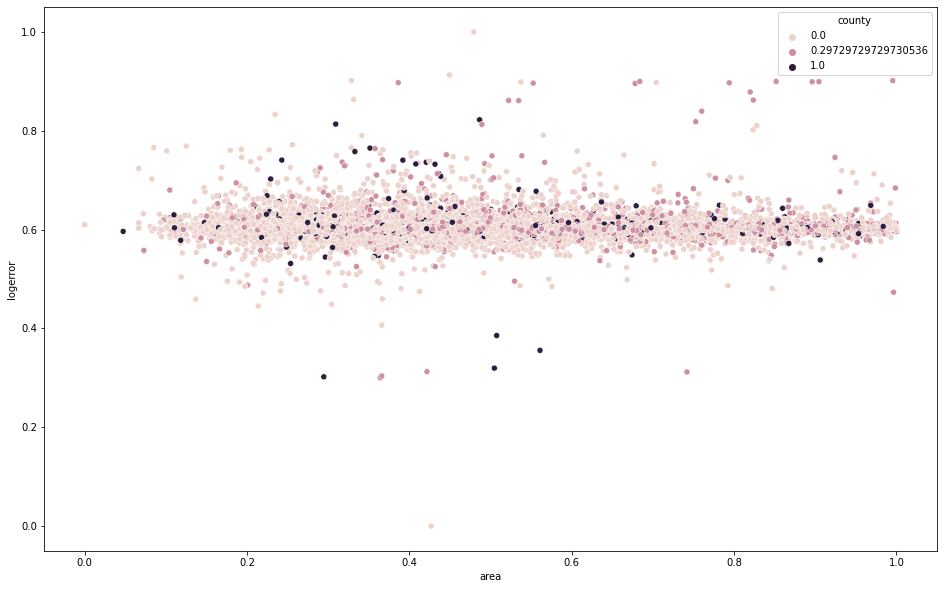

In [272]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'area', y = 'logerror', data = train, hue = 'county')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

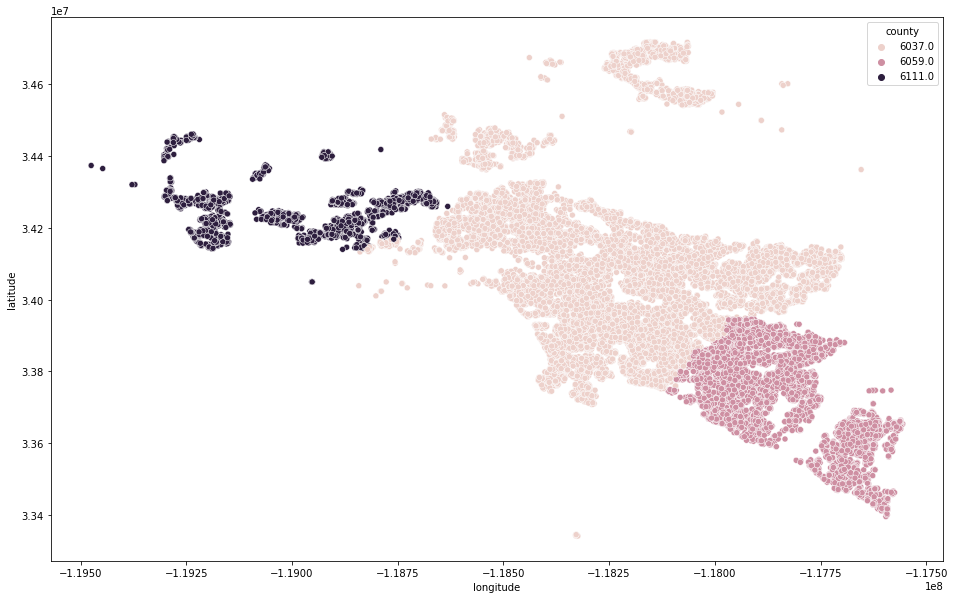

In [324]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'county')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

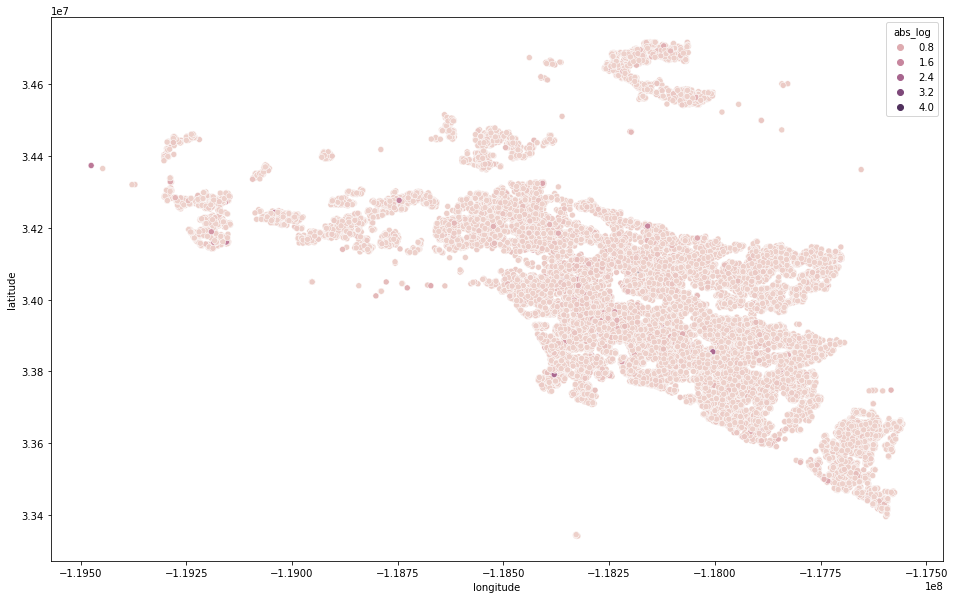

In [326]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'abs_log')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

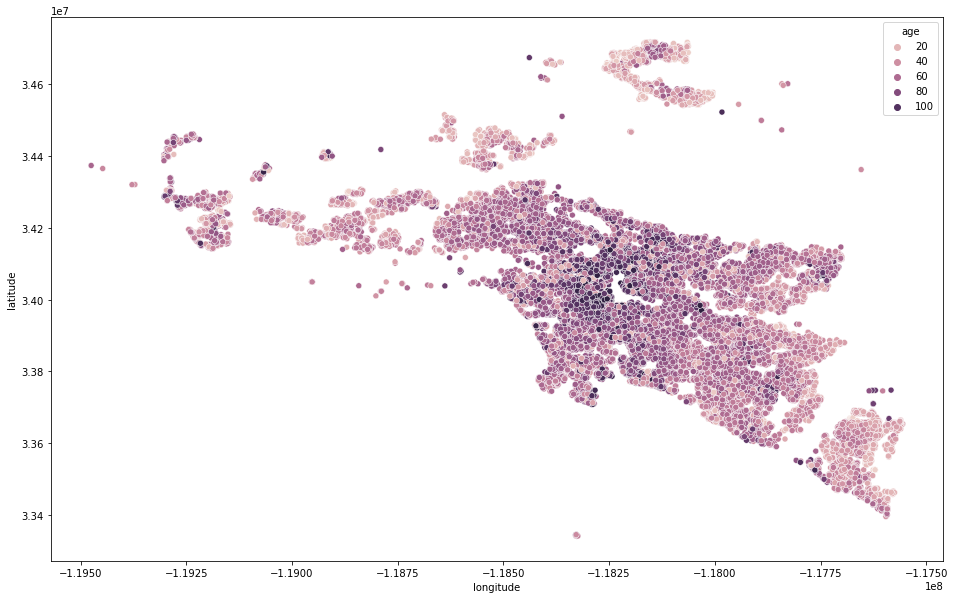

In [327]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'age')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

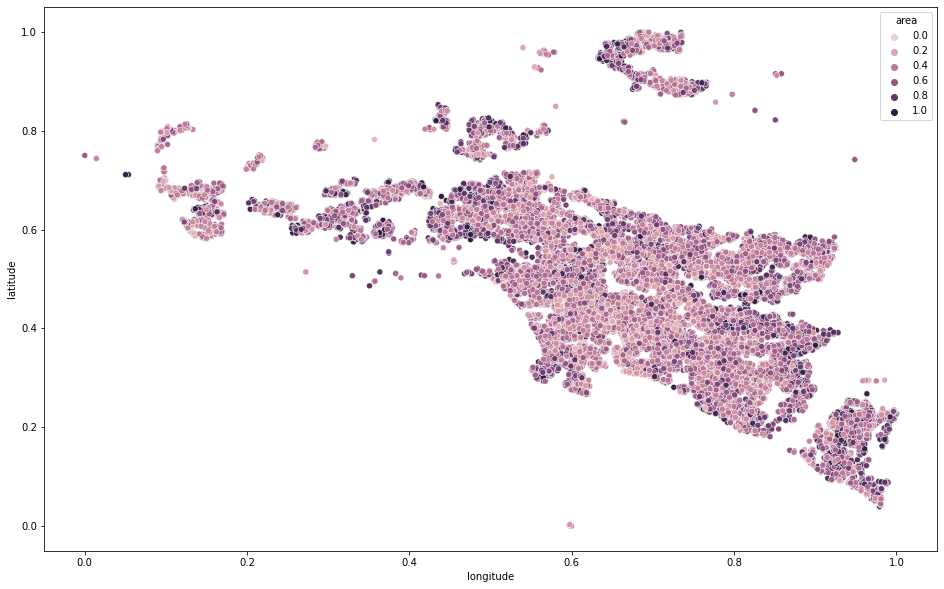

In [329]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = x_train_scaled, hue = 'area')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

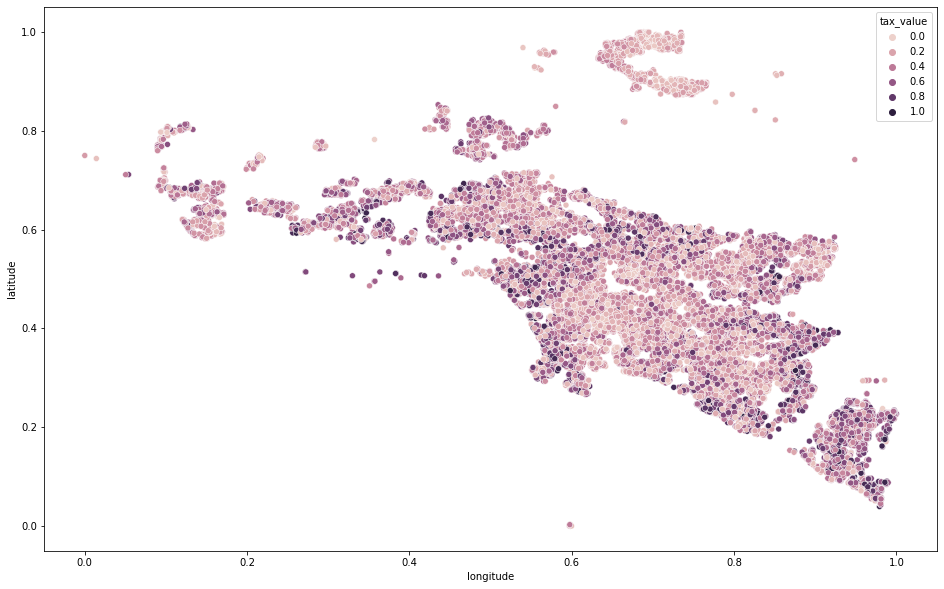

In [330]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = x_train_scaled, hue = 'tax_value')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

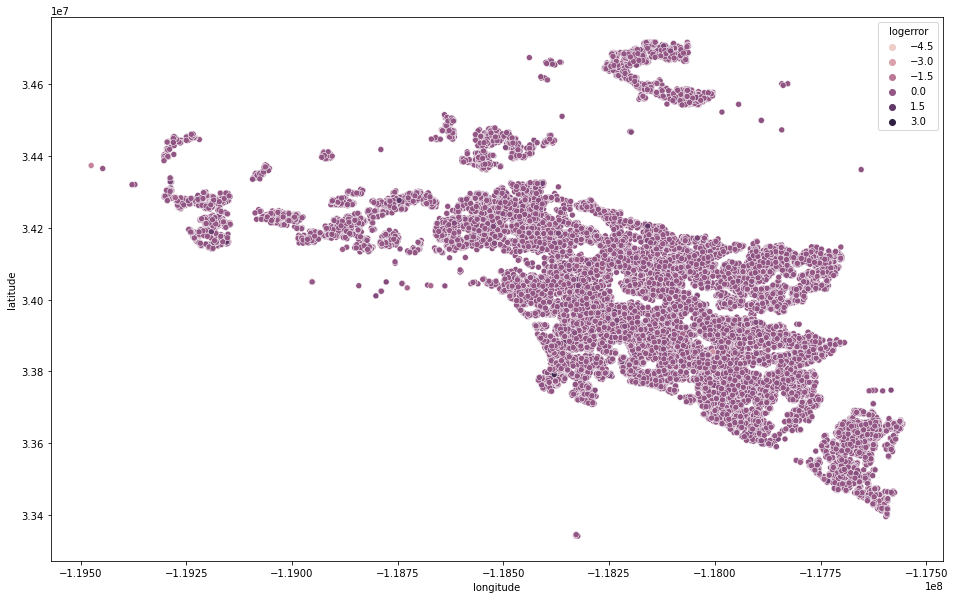

In [331]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'logerror')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

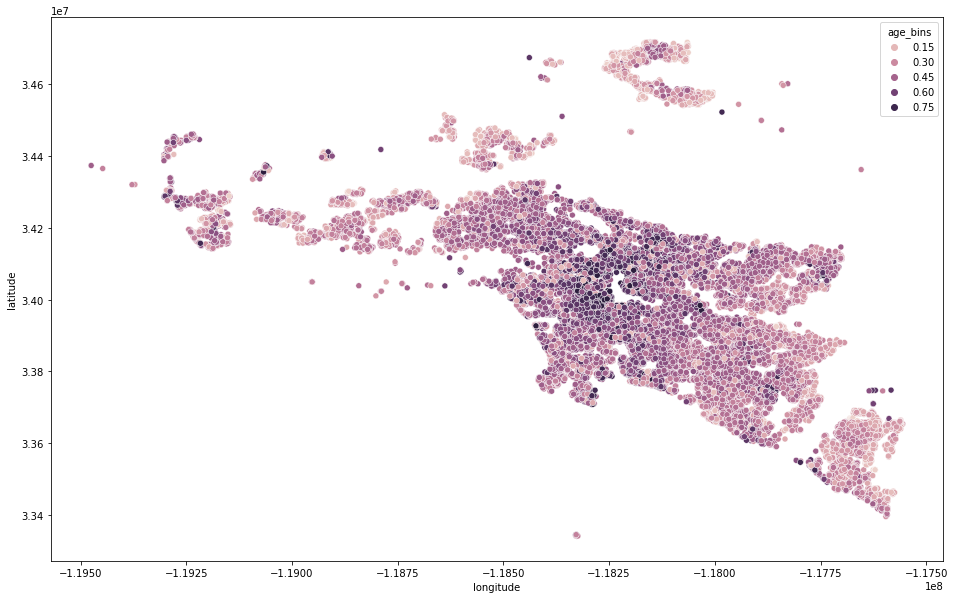

In [332]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'age_bins')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

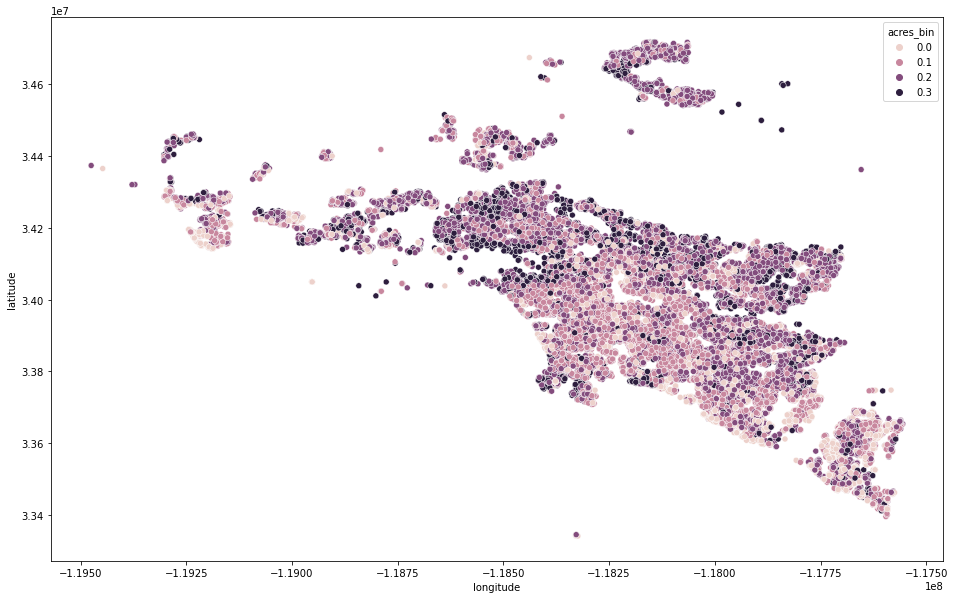

In [371]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'acres_bin')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

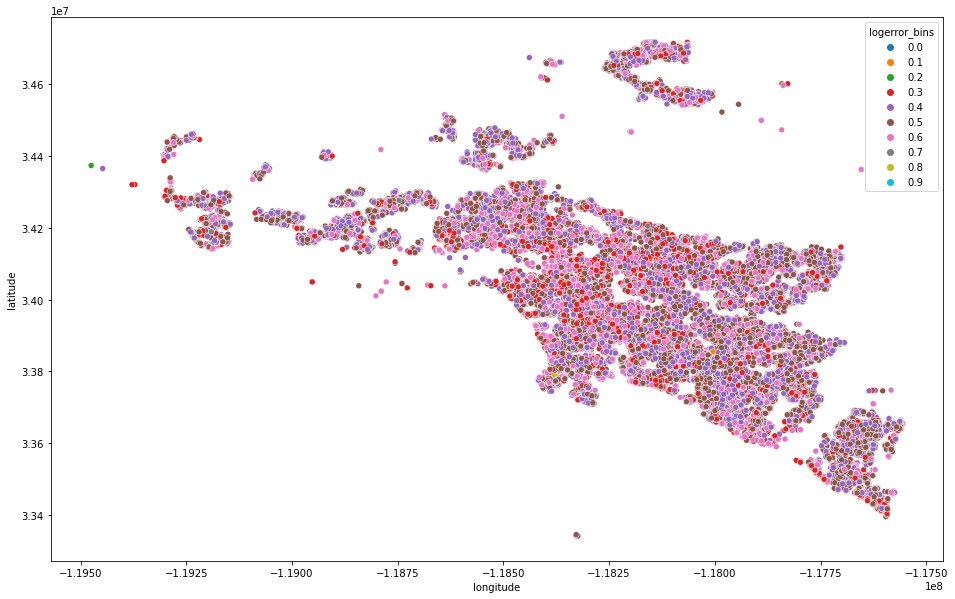

In [358]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'logerror_bins')

In [368]:
train['abs_log_bins'] = pd.cut(train.abs_log, bins = [0, .5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 5],
                                      labels = [0, .1, .2, .3, .4, .5, .6, .7, .9])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

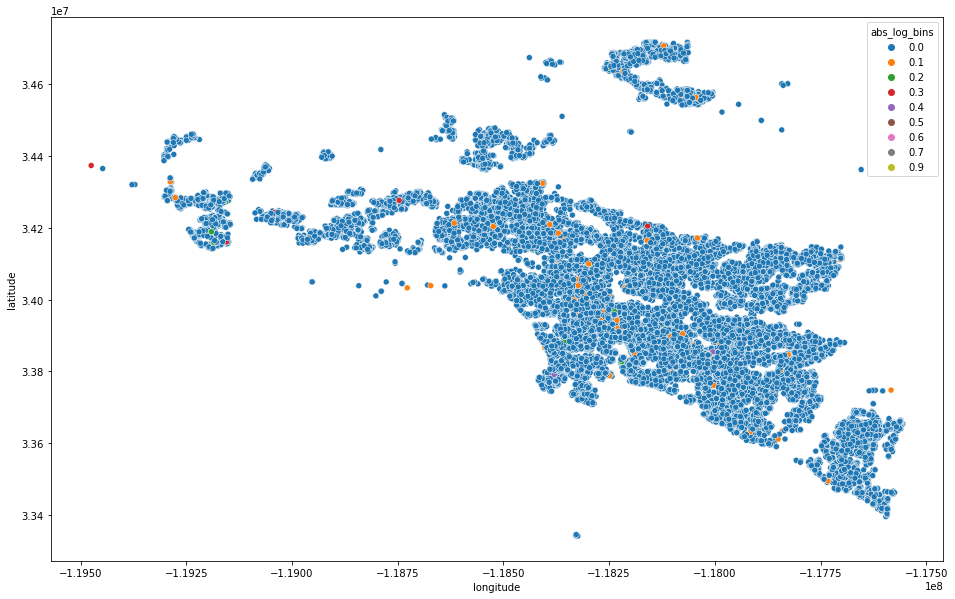

In [369]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = 'longitude', y = 'latitude', data = train, hue = 'abs_log_bins')

## Takeaways

Based on these graphs i see clusters around tax_value, age_bins, and acres_bins, will fuurther test these clusters

## Clustering

In [378]:
# list of variables I will cluster on. 
cluster_vars = ['age_bins', 'tax_value', 'acres_bin']
cluster_name = 'age_cluster'
k_range = range(2,20)

In [379]:
def find_k(x_train_scaled, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

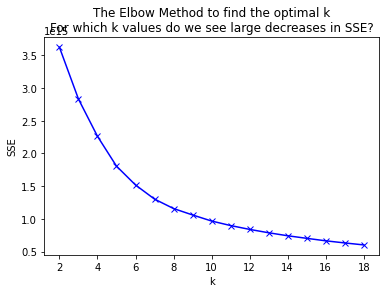

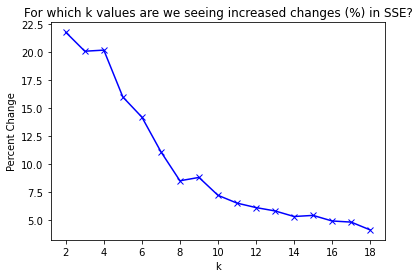

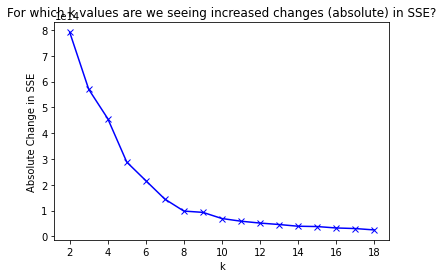

k           sse         delta  pct_delta
0    2  3.623308e+15  7.914918e+14       21.8
1    3  2.831817e+15  5.700755e+14       20.1
2    4  2.261741e+15  4.564794e+14       20.2
3    5  1.805262e+15  2.879477e+14       16.0
4    6  1.517314e+15  2.160372e+14       14.2
5    7  1.301277e+15  1.444457e+14       11.1
6    8  1.156831e+15  9.798518e+13        8.5
7    9  1.058846e+15  9.298411e+13        8.8
8   10  9.658618e+14  6.909015e+13        7.2
9   11  8.967716e+14  5.873014e+13        6.5
10  12  8.380415e+14  5.148595e+13        6.1
11  13  7.865555e+14  4.588156e+13        5.8
12  14  7.406740e+14  3.920926e+13        5.3
13  15  7.014647e+14  3.798850e+13        5.4
14  16  6.634762e+14  3.246843e+13        4.9
15  17  6.310078e+14  3.023400e+13        4.8
16  18  6.007738e+14  2.489548e+13        4.1

In [380]:
find_k(x_train_scaled, cluster_vars, k_range)

In [424]:
### Create Our Clusters
k = 6

cluster_vars = ['age_bins', 'tax_value', 'acres_bin']
cluster_name = 'area_cluster'

In [ ]:
#x_train_scaled[cluster_vars]

In [426]:
# Let's move forward with k=5
kmeans = KMeans(n_clusters = 6, random_state=420)
#kmeans.fit(x_train_scaled)
kmeans.fit(x_train_scaled[cluster_vars])

# And assign the cluster number to a column on the dataframe
x_train_scaled["cluster"] = kmeans.predict(x_train_scaled[cluster_vars])
x_train_scaled.head()

bathrooms  bedrooms      area    county  latitude  longitude  \
0   0.333333       0.4  0.561482  0.000000  0.581106   0.732089   
1   0.666667       0.8  0.898435  0.000000  0.563372   0.650667   
2   0.666667       0.4  0.714149  0.000000  0.388642   0.583245   
3   0.333333       0.4  0.383584  0.297297  0.375982   0.787405   
4   0.166667       0.2  0.278505  0.297297  0.364327   0.797497   

   lotsizesquarefeet  tax_value  landtaxvaluedollarcnt  taxamount  LA_County  \
0           0.691286   0.076407               0.043242   0.118489        1.0   
1           0.248630   0.434103               0.402679   0.479588        1.0   
2           0.823626   0.343969               0.147083   0.386473        1.0   
3           0.303816   0.121291               0.093696   0.152965        0.0   
4           0.029727   0.194148               0.198911   0.228457        0.0   

   Orange_County  Ventura_County       age     acres  bed_bath_ratio  \
0            0.0             0.0  0.727273  0.691286        0.500000   
1            0.0             0.0  0.309091  0.248630        0.571429   
2            0.0             0.0  0.236364  0.823626        0.285714   
3            1.0             0.0  0.545455  0.303816        0.500000   
4            1.0             0.0  0.463636  0.029727        0.428571   

   age_bins  acres_bin  cluster  
0  0.727520   1.000000        5  
1  0.363760   0.333333        2  
2  0.272480   1.000000        1  
3  0.544959   0.666667        5  
4  0.455041   0.000000        3

In [410]:
x_train_scaled.cluster.value_counts()

1    6588
4    5505
3    4722
0    3534
5    2862
2    2350
Name: cluster, dtype: int64

# Exploring Clusters

In [435]:
x_train_scaled.head()

bathrooms  bedrooms      area    county  latitude  longitude  \
0   0.333333       0.4  0.561482  0.000000  0.581106   0.732089   
1   0.666667       0.8  0.898435  0.000000  0.563372   0.650667   
2   0.666667       0.4  0.714149  0.000000  0.388642   0.583245   
3   0.333333       0.4  0.383584  0.297297  0.375982   0.787405   
4   0.166667       0.2  0.278505  0.297297  0.364327   0.797497   

   lotsizesquarefeet  tax_value  landtaxvaluedollarcnt  taxamount  LA_County  \
0           0.691286   0.076407               0.043242   0.118489        1.0   
1           0.248630   0.434103               0.402679   0.479588        1.0   
2           0.823626   0.343969               0.147083   0.386473        1.0   
3           0.303816   0.121291               0.093696   0.152965        0.0   
4           0.029727   0.194148               0.198911   0.228457        0.0   

   Orange_County  Ventura_County       age     acres  bed_bath_ratio  \
0            0.0             0.0  0.727273  0.691286        0.500000   
1            0.0             0.0  0.309091  0.248630        0.571429   
2            0.0             0.0  0.236364  0.823626        0.285714   
3            1.0             0.0  0.545455  0.303816        0.500000   
4            1.0             0.0  0.463636  0.029727        0.428571   

   age_bins  acres_bin  cluster  
0  0.727520   1.000000        5  
1  0.363760   0.333333        2  
2  0.272480   1.000000        1  
3  0.544959   0.666667        5  
4  0.455041   0.000000        3

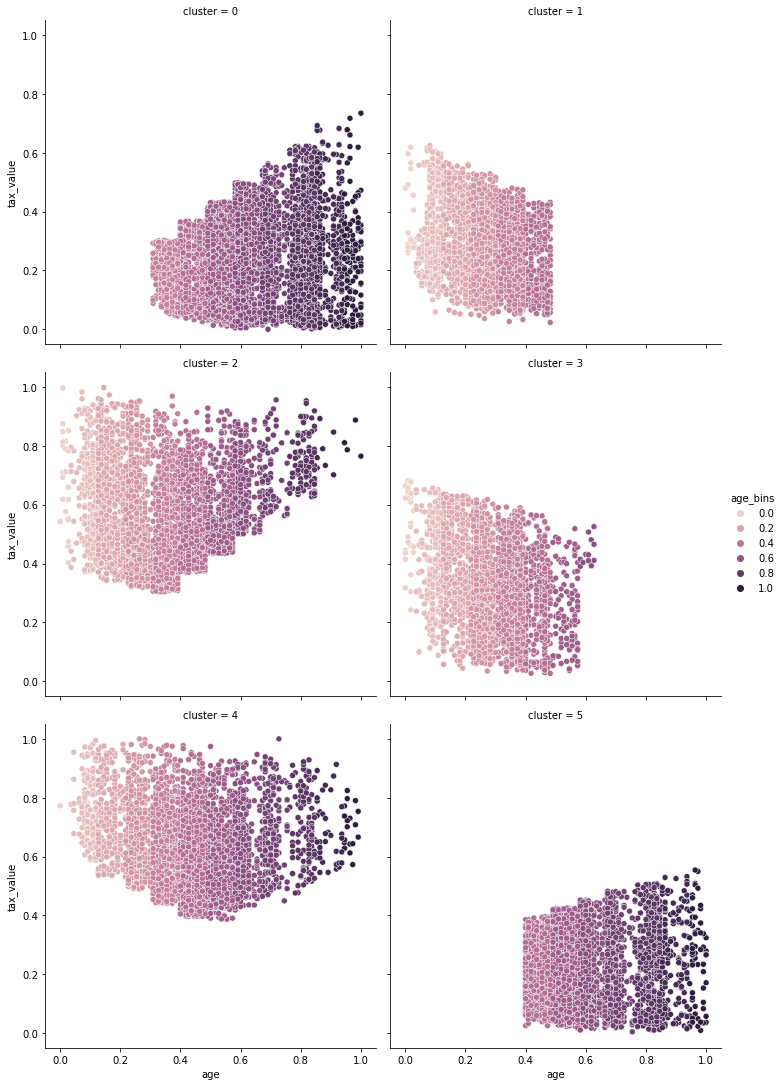

In [434]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=x_train_scaled, x="age", y="tax_value", col="cluster", hue="age_bins", col_wrap=2)

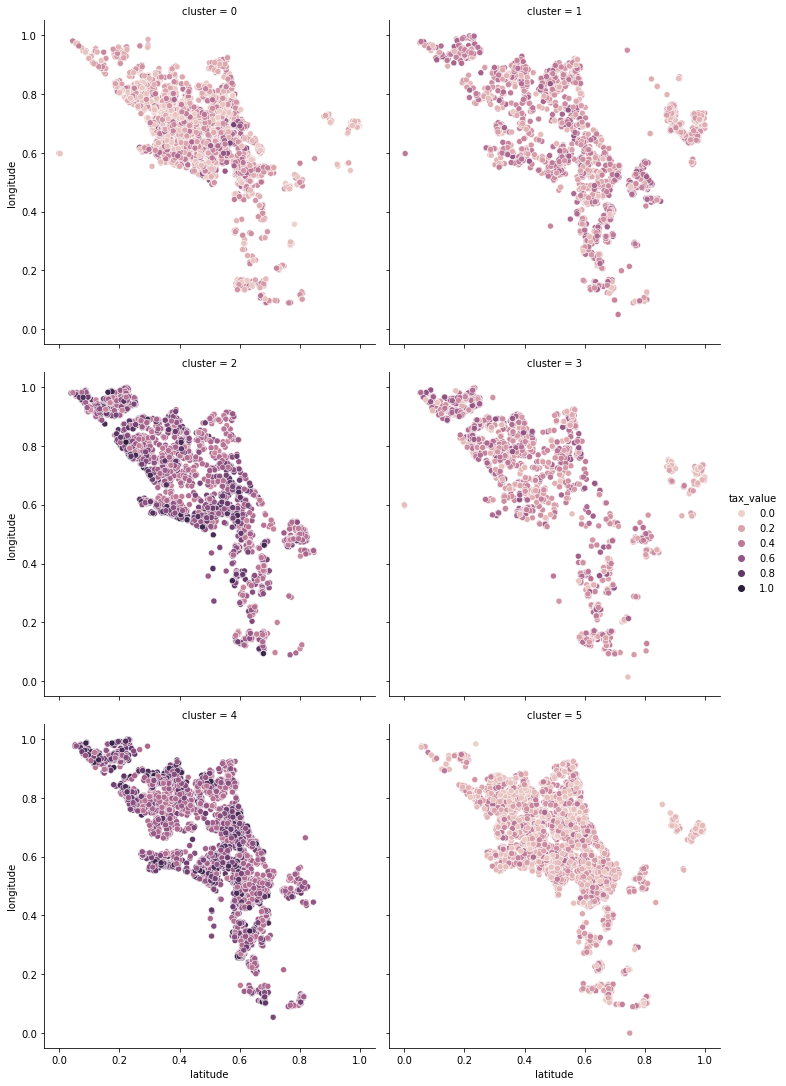

In [428]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=x_train_scaled, x="latitude", y="longitude", col="cluster", hue="tax_value", col_wrap=2)

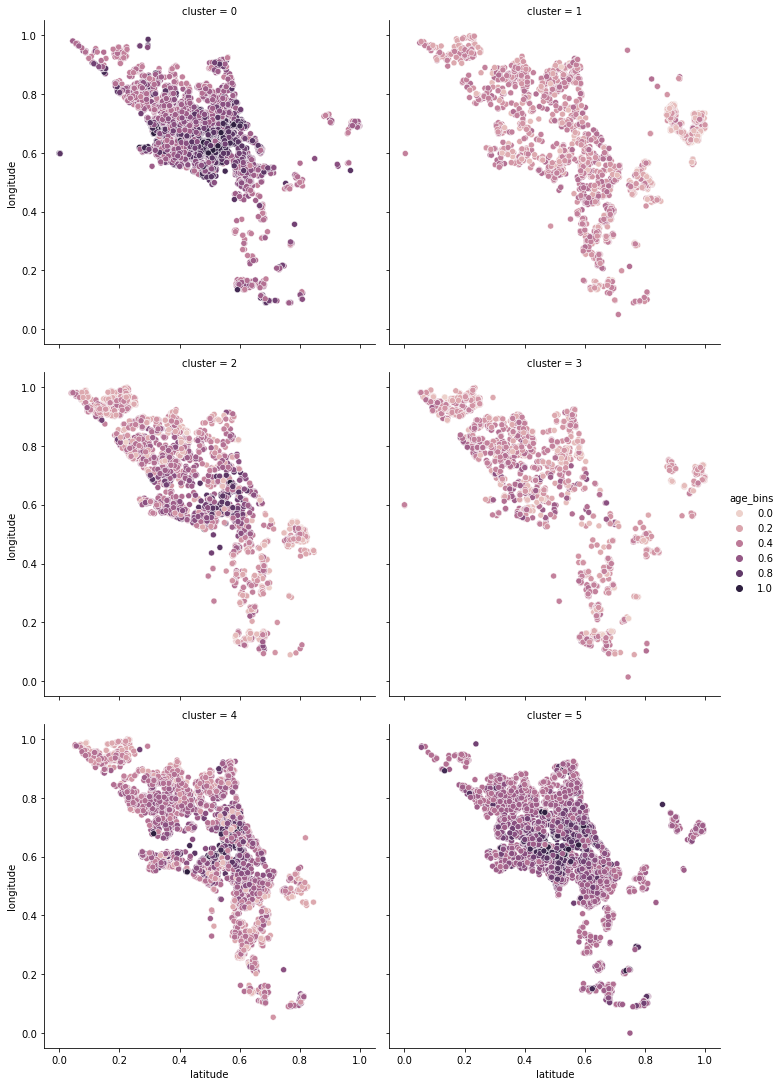

In [429]:
# plot out income vs. spending with regard to the cluster and age
sns.relplot(data=x_train_scaled, x="latitude", y="longitude", col="cluster", hue="age_bins", col_wrap=2)

Text(0.5, 1.0, 'Do clusters reveal differences in age and error?')

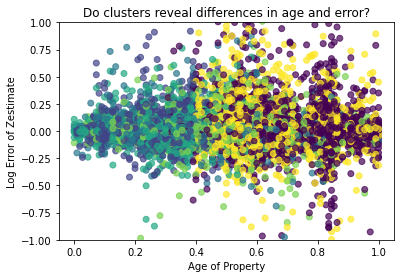

In [436]:
y_train = partitions[2]

plt.scatter(y = y_train.logerror, x = x_train_scaled.age, c = x_train_scaled.cluster, alpha=.7)
plt.ylim(-1,1)
plt.xlabel('Age of Property')
plt.ylabel('Log Error of Zestimate')
plt.title("Do clusters reveal differences in age and error?")

(-1.0, 1.0)

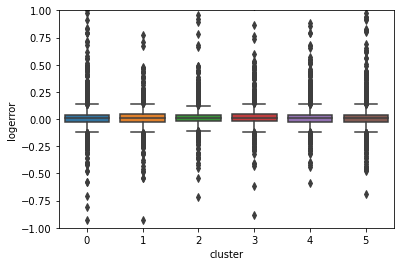

In [437]:
sns.boxplot(y=y_train.logerror, x=x_train_scaled.cluster)
plt.ylim(-1, 1)

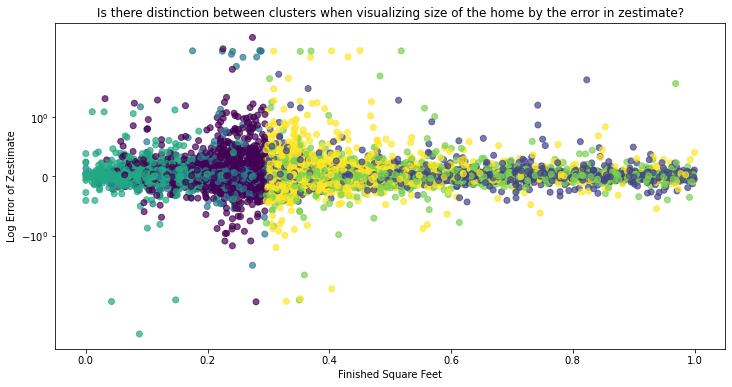

In [438]:
plt.figure(figsize=(12,6))
# plt.scatter(y=X_train.latitude, x=X_train.longitude, c=X_train.area_cluster, alpha=.4)
plt.scatter(y=y_train.logerror, x=x_train_scaled.acres, c=x_train_scaled.cluster, alpha=.7)
plt.yscale('symlog')
plt.xlabel('Finished Square Feet')
plt.ylabel('Log Error of Zestimate')
plt.title('Is there distinction between clusters when visualizing size of the home by the error in zestimate?')

plt.show()